# Programación 201

### Ejercicio 1

Carga los datos desde el archivo `netflixtitles.csv` , que puedes encontrar en la carpeta `data`, en un *dataframe*. Este conjunto de datos recoje información sobre películas y séries de TV de Netflix (https://www.kaggle.com/shivamb/netflix-shows) hasta el 2019.  

Muestra el número de filas del *dataframe* y los nombres de las columnas.

*Consideraciones:*

*  Muestra únicamente la información pedida en el enunciado.


In [14]:
import pandas as pd
import numpy as np
netflix_df = pd.read_csv('/content/netflixtitles.csv')
print('El número de filas del dataframe es:', netflix_df.shape[0])
print('Estos son los nombres de las columnas:', netflix_df.columns)


El número de filas del dataframe es: 6234
Estos son los nombres de las columnas: Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


### Ejercicio 2

Agrupa los datos cargados en el ejercicio 1 por **año** y, para cada año, muestra el número total de películas (*Movies*) y series de TV (*TV Show*) por separado. 

**Nota:** Al Notebook de teoría hemos visto cómo calcular la media de una agrupación de datos. Para resolver este ejercicio necesitarás investigar cómo contar (*count*) todos los valores de una columna en una agrupación. Te puede ser de utilidad la función [aggregate](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.aggregate.html) de pandas, la que nos permite aplicar diferentes funciones a una columna en un ```groupby```.


In [15]:
netflix_df_ordered = netflix_df.groupby(['release_year', 'type']).agg({'show_id': 'count'})
netflix_df_ordered

show_id
release_year type            
1925         TV Show        1
1942         Movie          2
1943         Movie          3
1944         Movie          3
1945         Movie          3
...                       ...
2018         TV Show      417
2019         Movie        400
             TV Show      443
2020         Movie          6
             TV Show       19

[115 rows x 1 columns]

### Ejercicio 3

Muestra las películas estrenadas el _2019_ que tienen una duración superior a _100_ minutos. 

**Nota:** Al Notebook de teoría hemos visto operaciones básicas de filtrado. Para resolver este ejercicio necesitarás investigar cómo aplicar condiciones más complejas. 

**Nota 2:** Los valores de la columna de duración (*duration*) son strings, ya que combinan números y letras. Por lo tanto, se tienen que transformar a int una vez se haya construido el subset de datos de películas. Te puede ser de utilidad la función [astype](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.astype.html) de pandas.
 


In [16]:
netflix_df.dtypes

show_id          int64
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [17]:
netflix_df.duration

0               90
1               94
2         1 Season
3         1 Season
4               99
           ...    
6229    13 Seasons
6230     4 Seasons
6231            60
6232     2 Seasons
6233    10 Seasons
Name: duration, Length: 6234, dtype: object

In [18]:
filter1 = netflix_df['type'].isin(['Movie'])
filter2 = netflix_df['release_year'].isin(['2019'])
movies_2019 = netflix_df[filter1 & filter2]
movies_2019.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
35,81154455,Movie,Article 15,Anubhav Sinha,"Ayushmann Khurrana, Nassar, Manoj Pahwa, Kumud...",India,"September 6, 2019",2019,TV-MA,125,"Dramas, International Movies, Thrillers",The grim realities of caste discrimination com...
38,81132437,Movie,Kill Me If You Dare,Şenol Sönmez,"Murat Boz, Seda Bakan, Açelya Topaloğlu, Özgür...",NaN,"September 6, 2019",2019,TV-14,100,"Comedies, International Movies, Romantic Movies","Bogged down with money problems, a couple grow..."
44,81176188,Movie,American Factory: A Conversation with the Obamas,NaN,"President Barack Obama, Michelle Obama, Julia ...",NaN,"September 5, 2019",2019,TV-G,10,Documentaries,Barack and Michelle Obama talk with directors ...
57,81078908,Movie,The World We Make,Brian Baugh,"Caleb Castille, Rose Reid, Kevin Sizemore, Gre...",United States,"September 4, 2019",2019,PG,108,"Dramas, Romantic Movies",A teenage equestrian and a local football play...


In [19]:
duration_int = pd.to_numeric(movies_2019['duration'])
duration_int

0        90
35      125
38      100
44       10
57      108
       ... 
5451     61
5455     91
5463     59
5464     91
5469    118
Name: duration, Length: 400, dtype: int64

In [143]:
movies_2019['duration']=duration_int
#DUDA: cómo puedo hacer para que no me aparezca el warning??? con .loc cómo sería?

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [21]:
movies_2019[movies_2019['duration']>100]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
35,81154455,Movie,Article 15,Anubhav Sinha,"Ayushmann Khurrana, Nassar, Manoj Pahwa, Kumud...",India,"September 6, 2019",2019,TV-MA,125,"Dramas, International Movies, Thrillers",The grim realities of caste discrimination com...
57,81078908,Movie,The World We Make,Brian Baugh,"Caleb Castille, Rose Reid, Kevin Sizemore, Gre...",United States,"September 4, 2019",2019,PG,108,"Dramas, Romantic Movies",A teenage equestrian and a local football play...
102,80231903,Movie,In the Shadow of the Moon,Jim Mickle,"Boyd Holbrook, Michael C. Hall, Cleopatra Cole...",United States,"September 27, 2019",2019,TV-MA,116,"Dramas, Sci-Fi & Fantasy, Thrillers",A Philadelphia detective slowly unravels as he...
109,81177238,Movie,Malaal,Mangesh Hadawale,"Meezaan Jaffrey, Sharmin Segal, Chinmaya Surve...",India,"September 26, 2019",2019,TV-14,133,"International Movies, Romantic Movies",Class divides become thorns in the budding rom...
119,81186758,Movie,Oh! Baby (Malayalam),B. V. Nandini Reddy,"Samantha Ruth Prabhu, Lakshmi, Rajendraprasad,...",India,"September 25, 2019",2019,TV-14,146,"Comedies, International Movies, Music & Musicals",A surly septuagenarian gets another chance at ...
...,...,...,...,...,...,...,...,...,...,...,...,...
5347,81076749,Movie,Ek Ladki Ko Dekha Toh Aisa Laga,Shelly Chopra Dhar,"Anil Kapoor, Sonam Kapoor, Rajkummar Rao, Juhi...",India,"April 2, 2019",2019,TV-14,120,"Comedies, Dramas, International Movies",As her family seeks to marry her off and a hop...
5359,81033430,Movie,Music Teacher,Sarthak Dasgupta,"Manav Kaul, Amrita Bagchi, Divya Dutta, Neena ...",India,"April 19, 2019",2019,TV-14,102,"Dramas, Independent Movies, International Movies",A dejected small-town music teacher grapples w...
5365,81080942,Movie,The Ruthless,Renato De Maria,"Riccardo Scamarcio, Sara Serraiocco, Alessio P...","Italy, France","April 19, 2019",2019,TV-MA,111,"Dramas, International Movies",A rebellious teen grows up to become one of Mi...
5385,81013626,Movie,HOMECOMING: A film by Beyoncé,Beyoncé Knowles-Carter,Beyoncé Knowles-Carter,NaN,"April 17, 2019",2019,TV-MA,138,"Documentaries, Music & Musicals","This intimate, in-depth look at Beyoncé's cele..."


### Ejercicio 4

Queremos buscar aquellos países donde se estrenaron más de 10 películas al año. Debes mostrar por pantalla el **año**, el **nombre del país** y el **número total de películas** estrenadas en el año correspondiente.

**Nota**: Además del contenido de los notebooks de teoría, puedes utilizar lo que has aprendido haciendo el ejercicio 2.


In [22]:
netflix_df_countries = netflix_df.groupby(['type','release_year','country']).agg({'show_id': 'count'})
netflix_df_countries

show_id
type    release_year country                               
Movie   1942         United States                        2
        1943         United States                        3
        1944         United States                        2
                     United States, United Kingdom        1
        1945         United States                        3
...                                                     ...
TV Show 2020         China                                1
                     France                               1
                     India                                1
                     United Kingdom                       1
                     United States                        8

[1524 rows x 1 columns]

In [23]:
movies_countries = netflix_df_countries.loc['Movie']
movies_countries_10 = movies_countries[movies_countries['show_id']>10]
movies_countries_10

show_id
release_year country                
1997         United States        17
1998         United States        12
2000         United States        14
2001         United States        13
2002         United States        12
2003         United States        14
2004         India                13
             United States        11
2005         India                17
             United States        16
2006         India                17
             United States        24
2007         India                13
             United States        23
2008         India                24
             United States        28
2009         India                24
             United States        29
2010         India                31
             United States        25
2011         India                26
             United States        30
2012         India                33
             United States        40
2013         India                44
             United States        52
2014         India                38
             United Kingdom       13
             United States        59
2015         India                53
             Spain                11
             United Kingdom       18
             United States       104
2016         Canada               15
             India                66
             Mexico               13
             Spain                14
             United Kingdom       35
             United States       185
2017         Canada               20
             India                99
             Spain                18
             United Kingdom       36
             United States       260
2018         Canada               18
             India                79
             South Korea          11
             Spain                23
             United Kingdom       26
             United States       219
2019         India                49
             Spain                11
             United Kingdom       11
             United States       160

### Ejercicio 5

Crea una copia del dataframe original añadiendo una nueva columna que nos indicará por cada fila la duración de la película. Definimos tres niveles:

- **short** : si la duración es inferior a 90 minutos. 
- **medium** : si la duración está entre 90 y 150 minutos.
- **long** : si la duración es superior a 150 minutos.

Muestra por pantalla aquellas filas que correspondan a una duración corta ( _short_ ). 

**Nota:** pandas nos ofrece principalmente tres maneras de añadir nuevas columnas a un dataframe existente. Cualquiera de las tres formas son válidas para resolver este ejercicio. Podéis buscar en Internet cómo añadir columnas a un dataframe de pandas, ya que la documentación presenta los tres métodos de forma separada.


In [24]:
netflix_df2 = netflix_df[netflix_df['type'].isin(['Movie'])]
netflix_df2['duration']=pd.to_numeric(netflix_df2['duration'])
netflix_df2.dtypes
netflix_df2['duration_level']= netflix_df2.apply(lambda x: 'short' if int(x['duration']) < 90 else ('medium' if int(x['duration']) < 150 else 'long'), axis=1)
netflix_df2[netflix_df2['duration_level'].isin(['short'])]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,duration_level
7,80164077,Movie,Fabrizio Copano: Solo pienso en mi,"Rodrigo Toro, Francisco Schultz",Fabrizio Copano,Chile,"September 8, 2017",2017,TV-MA,60,Stand-Up Comedy,Fabrizio Copano takes audience participation t...,short
10,80169755,Movie,Joaquín Reyes: Una y no más,José Miguel Contreras,Joaquín Reyes,NaN,"September 8, 2017",2017,TV-MA,78,Stand-Up Comedy,Comedian and celebrity impersonator Joaquín Re...,short
12,80182480,Movie,Krish Trish and Baltiboy,NaN,"Damandeep Singh Baggan, Smita Malhotra, Baba S...",NaN,"September 8, 2017",2009,TV-Y7,58,Children & Family Movies,"A team of minstrels, including a monkey, cat a...",short
13,80182483,Movie,Krish Trish and Baltiboy: Battle of Wits,"Munjal Shroff, Tilak Shetty","Damandeep Singh Baggan, Smita Malhotra, Baba S...",NaN,"September 8, 2017",2013,TV-Y7,62,Children & Family Movies,"An artisan is cheated of his payment, a lion o...",short
14,80182596,Movie,Krish Trish and Baltiboy: Best Friends Forever,"Munjal Shroff, Tilak Shetty","Damandeep Singh Baggan, Smita Malhotra, Deepak...",NaN,"September 8, 2017",2016,TV-Y,65,Children & Family Movies,"A cat, monkey and donkey team up to narrate fo...",short
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5573,80171439,Movie,The Human Factor: The Untold Story of the Bomb...,Rudradeep Bhattacharjee,NaN,India,"April 1, 2017",2013,TV-PG,53,"Documentaries, International Movies, Music & M...",A family of Parsi musicians collectively works...,short
5574,80104237,Movie,The Tenth Man,Daniel Burman,"Alan Sabbagh, Julieta Zylberberg, Usher Barilk...",Argentina,"April 1, 2017",2016,TV-MA,81,"Dramas, International Movies",After spending much of his adult life in New Y...,short
5577,80085438,Movie,Frank and Cindy,G.J. Echternkamp,NaN,United States,"April 1, 2016",2007,TV-MA,70,Documentaries,Frank was a rising pop star when he married Ci...,short
5579,80011846,Movie,Iverson,Zatella Beatty,Allen Iverson,United States,"April 1, 2016",2014,NR,88,"Documentaries, Sports Movies",This unfiltered documentary follows the rocky ...,short


### Ejercicio 6

En este ejercicio trabajaremos con el dataset de Netflix, pero analizando las series de TV. Muestra un gráfico de barras con el número de series de TV americanas agrupadas por categoría (*listed_in*).


Consideraciones:

- Debes mostrar los datos de manera horizontal (barras horizontales).
- El eje de las Y debe incluir las etiquetas de las categorías de las series de TV.
- Debe incluir un texto con el número de series por cada categoría del gráfico. El texto debería estar situado a la derecha de cada barra.

**Nota**: En el Notebook de teoría hemos visto cómo mostrar gráficos lineares simples con el matplotlib. Para este ejercicio explora las funcionalidades que presenta la librería pandas para generar gráficos a partir de dataframes. También pueden ser de utilidad las funciones [text](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.text.html) o [annotate](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.annotate.html) para mostrar el número de series al lado de cada barra. 


In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

netflix_df['type'].unique()
netflix_TVseries = netflix_df[netflix_df['type'].isin(['TV Show'])]
american_netflix_TVseries = netflix_TVseries[netflix_TVseries['country'].isin(['United States'])]
american_netflix_TVseries.listed_in.unique()

array(["Kids' TV", 'Docuseries, Science & Nature TV',
       'Romantic TV Shows, TV Comedies, TV Dramas',
       'Crime TV Shows, TV Dramas, TV Mysteries', 'TV Comedies',
       'Docuseries', "Kids' TV, TV Comedies",
       'International TV Shows, Reality TV, Spanish-Language TV Shows',
       'TV Comedies, TV Dramas, Teen TV Shows', 'TV Comedies, TV Dramas',
       'TV Comedies, TV Dramas, TV Mysteries',
       'Crime TV Shows, TV Comedies, TV Dramas',
       'TV Horror, Teen TV Shows', 'Crime TV Shows, Docuseries',
       'Reality TV', 'Stand-Up Comedy & Talk Shows, TV Comedies',
       'Crime TV Shows, TV Dramas',
       'TV Action & Adventure, TV Dramas, TV Sci-Fi & Fantasy',
       'Docuseries, Reality TV',
       "Kids' TV, TV Action & Adventure, TV Dramas",
       'Anime Series, Crime TV Shows',
       'Stand-Up Comedy & Talk Shows, TV Mysteries, TV Sci-Fi & Fantasy',
       'Reality TV, TV Comedies, TV Horror',
       'TV Action & Adventure, TV Comedies, TV Horror',
       'TV

In [71]:
american_netflix_TVseries_listed_in=american_netflix_TVseries["listed_in"].str.split(',', expand=True)
#si quisiera tener el dataframe original con las columna listed_in separada en varias columnas por las comas, haría lo siguiente, pero no me hace falta para este ejercicio
#american_netflix_TVseries_new=pd.concat([american_netflix_TVseries, american_netflix_TVseries_listed_in], axis=1)
#american_netflix_TVseries_new
#DUDA: Por qué no podría hacerlo con merge? Me da error la siguiente instrucción:
#pd.merge(american_netflix_TVseries, american_netflix_TVseries_listed_in, on='key')

In [72]:
american_netflix_listed_in = american_netflix_TVseries_listed_in.stack().reset_index(-1, drop=True)
american_netflix_listed_in

2                   Kids' TV
3                   Kids' TV
8                 Docuseries
8        Science & Nature TV
54         Romantic TV Shows
                ...         
6229             TV Comedies
6229     TV Sci-Fi & Fantasy
6230             TV Comedies
6233       Classic & Cult TV
6233             TV Comedies
Length: 1033, dtype: object

In [98]:
american_netflix_listed_in.unique()

array(["Kids' TV", 'Docuseries', ' Science & Nature TV',
       'Romantic TV Shows', ' TV Comedies', ' TV Dramas',
       'Crime TV Shows', ' TV Mysteries', 'TV Comedies',
       'International TV Shows', ' Reality TV',
       ' Spanish-Language TV Shows', ' Teen TV Shows', 'TV Horror',
       ' Docuseries', 'Reality TV', 'Stand-Up Comedy & Talk Shows',
       'TV Action & Adventure', ' TV Sci-Fi & Fantasy',
       ' TV Action & Adventure', 'Anime Series', ' Crime TV Shows',
       ' TV Horror', 'TV Dramas', ' TV Thrillers',
       ' International TV Shows', 'British TV Shows',
       ' Romantic TV Shows', ' Stand-Up Comedy & Talk Shows',
       'Classic & Cult TV', 'TV Shows', " Kids' TV"], dtype=object)

In [100]:
type(american_netflix_listed_in)

pandas.core.series.Series

In [109]:
american_netflix_listed_pd = american_netflix_listed_in.to_frame()

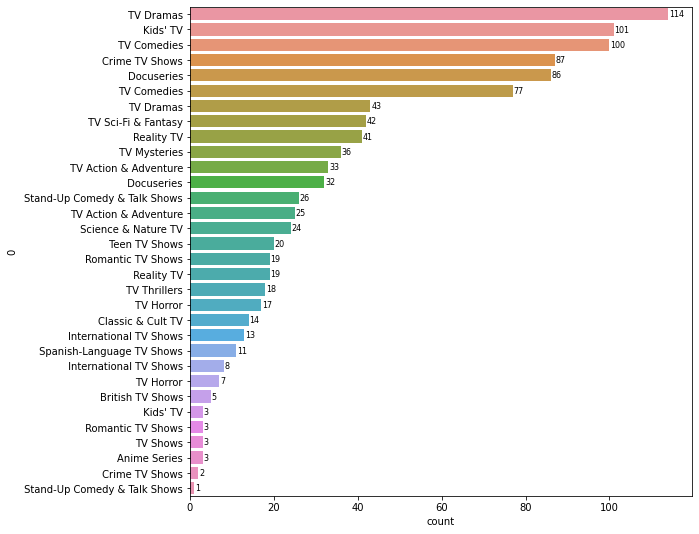

In [124]:
#DUDA: No entiendo muy bien ax
fig, ax = plt.subplots(figsize = (9, 9))
grafica = sns.countplot(y=american_netflix_listed_pd[0], order=american_netflix_listed_pd[0].value_counts().index)
y = american_netflix_listed_pd[0].value_counts()    
for i, v in enumerate(y):
    grafica.text(v + 0.2, i+0.16, str(v), color='black', fontweight='light', fontsize=8)

In [ ]:
#DUDA
#Con anotate tengo dudas, no he conseguido que me saliera, lo intentaré en otro momento
#for p in grafica.patches:
#    grafica.annotate(format(p.get_height(), '.1f'), 
#                   (p.get_width(), p.get_y() + p.get_height() /2.), 
#                   ha = 'center', va = 'center', 
#                   xytext = (12, 0), 
#                   textcoords = 'offset points')


### Ejercicio Opcional

Python es un lenguaje de programación muy utilizado en el procesamiento de imágenes. En este ejercicio veremos una aplicación de detección de elementos en una imagen de microscopía de escaneo (en inglés: Scanning Element Microscopy (SEM)).

En esta imagen se puede ver una muestra de vidrio (gris claro) con algunas burbujas (elementos negros) y granos de arena (gris oscuro). Queremos ser capaces de detectar los diferentes elementos de la muestra a partir de la imagen.

Una imagen se puede ver como una matriz bidimensional donde cada elemento de la matriz corresponde al valor de un pixel de la imagen. Por ejemplo, si miramos la matriz de la imagen que os proporcionamos, veremos valores que van de 0 a 255. Así pues, para distinguir los diferentes elementos de la muestra de vidrio, nos tendremos que fijar en el nivel de gris de los píxeles de la imagen a través del histograma. <span style="font-family: Courier New; background-color: #f2ae72; color: #000000; padding: 3px; ">EI</span> 


Parte A: 

* Para poder identificar mejor los elementos de la muestra de vidrio, primero hemos aplicado un filtro de mediana para reducir el ruido. Grafica ahora la distribución de los píxeles de la imagen inicial y la imagen filtrada. ¿Qué diferencia puedes apreciar entre ambas distribuciones?

**Nota:** Utiliza la función [distplot](https://seaborn.pydata.org/generated/seaborn.distplot.html) de la librería Seaborn para visualizar la distribución de los valores píxeles de la imagen.

Parte B: 

* Utilizando los valores del distribution plot de la imagen filtrada, determina unos umbrales que permitan diferenciar los píxeles de arena, los píxeles de vidrio y los píxeles de burbuja.

* Una vez que hayas definido los umbrales, muestra por pantalla una imagen donde cada uno de los elementos esté en un color diferente. 


array([[[134, 134, 134],
        [128, 128, 128],
        [125, 125, 125],
        ...,
        [  2,   2,   2],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[132, 132, 132],
        [128, 128, 128],
        [126, 126, 126],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[131, 131, 131],
        [127, 127, 127],
        [127, 127, 127],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       ...,

       [[100, 100, 100],
        [102, 102, 102],
        [103, 103, 103],
        ...,
        [137, 137, 137],
        [137, 137, 137],
        [137, 137, 137]],

       [[101, 101, 101],
        [113, 113, 113],
        [116, 116, 116],
        ...,
        [138, 138, 138],
        [138, 138, 138],
        [138, 138, 138]],

       [[119, 119, 119],
        [117, 117, 117],
        [111, 111, 111],
        ...,
        [134, 134, 134],
        [138, 138, 138],
        [142, 142, 142]]

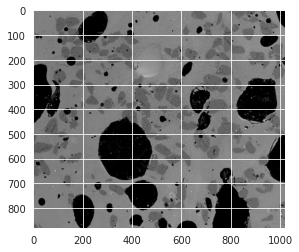

In [181]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
SEM = cv2.imread('/content/SEM_image.jpg')
plt.imshow(SEM)
SEM

array([[[132, 132, 132],
        [128, 128, 128],
        [126, 126, 126],
        ...,
        [  1,   1,   1],
        [  2,   2,   2],
        [  2,   2,   2]],

       [[131, 131, 131],
        [128, 128, 128],
        [127, 127, 127],
        ...,
        [  1,   1,   1],
        [  1,   1,   1],
        [  1,   1,   1]],

       [[130, 130, 130],
        [127, 127, 127],
        [127, 127, 127],
        ...,
        [  0,   0,   0],
        [  1,   1,   1],
        [  1,   1,   1]],

       ...,

       [[101, 101, 101],
        [102, 102, 102],
        [103, 103, 103],
        ...,
        [137, 137, 137],
        [137, 137, 137],
        [137, 137, 137]],

       [[102, 102, 102],
        [111, 111, 111],
        [109, 109, 109],
        ...,
        [137, 137, 137],
        [138, 138, 138],
        [138, 138, 138]],

       [[117, 117, 117],
        [116, 116, 116],
        [111, 111, 111],
        ...,
        [138, 138, 138],
        [138, 138, 138],
        [138, 138, 138]]

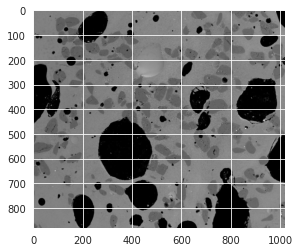

In [159]:
SEM_fmediana = cv2.medianBlur(SEM,3)
plt.imshow(SEM_fmediana)
SEM_fmediana

In [160]:
#muestra la imagen cv2. imshow ('Median Filter Processing', procesado_imagen) # guardar imagen en el disco cv2.imwrite ('procesado_imagen.png', procesado_imagen) # pausar la ejecución del script hasta que se presione una tecla en el teclado cv2.waitKey (0)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


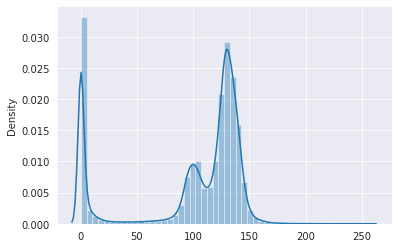

In [161]:
sns.set_style("darkgrid")
sns.distplot(SEM)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


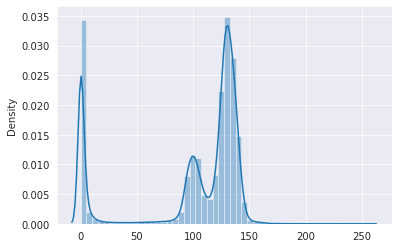

In [162]:
sns.distplot(SEM_fmediana)

In [208]:
#RESPUESTA: La verdad que mirando las gráficas anteriores no encuentro grandes diferencias estre una y otra.. En las distribuciones sí que se diferencian 3 tonos diferentes: uno arededor del valor 0 (negro: burbujas), otro alrededor de 100 (gris oscuro: arena) y otro alrededor de 140 (gris claro: vidrio), con mayores frecuencias el de 0 y 140
#DUDA: cómo puedo hacer para que no me aparezca el warning de antes de la gráfica???

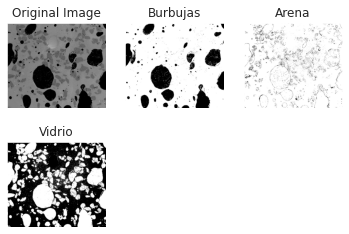

In [258]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
ret,thresh1 = cv.threshold(SEM,15,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(SEM,90,255,cv.THRESH_BINARY)
ret,thresh3 = cv.threshold(SEM,115,255,cv.THRESH_BINARY_INV)
titles = ['Original Image','Burbujas','Arena','Vidrio']
images = [SEM, thresh1,255-(thresh1-thresh2),thresh3]
for i in range(4):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

In [ ]:
#En los dibujos anteriores, lo que no es blanco serán en cada uno de los dibujos correspondiente las burbujas, la arena y el vidrio. La arena no he conseguido que me saliera en negro, sale en gris, y no entiendo por qué. 
#Falta cambiar los colores negros por colores diferentes segun el dibujo y fusionar las tres imágenes: burbujas, arena y vidrio. Estoy ya un poco bloqueada. Lo intento en otro momento


TypeError: ignored

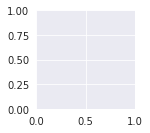

In [259]:
#DUDA: Si trabajo con SEM_fmediana en el apartado anterior, calculando los threshold, me da error
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
ret,thresh1 = cv.threshold(SEM_fmediana,15,255,cv.THRESH_BINARY)
ret,thresh2 = cv.threshold(SEM_fmediana,90,255,cv.THRESH_BINARY)
ret,thresh3 = cv.threshold(SEM_fmediana,115,255,cv.THRESH_BINARY_INV)
titles = ['Original Image','Burbujas','Arena','Vidrio']
images = [SEM_fmediana, thresh1,255-(thresh1-thresh2),thresh3]
for i in range(4):
    plt.subplot(2,3,i+1),plt.imshow(images[i],'gray',vmin=0,vmax=255)
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()